<a href="https://colab.research.google.com/github/zarembaMichal/LetsStart/blob/main/Defaults_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Wczytanie i wstępna analiza danych

In [ ]:
defaults = pd.read_csv("defaults.csv", sep = ";")

In [ ]:
from IPython.display import display

# Wyświetlenie pierwszych pięciu wierszy danych
display(defaults.head())

# Wyświetlenie statystyk opisowych
display(defaults.describe())

# Wyświetlenie informacji o DataFrame
print("Informacje o danych:")
defaults.info()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27999.00000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,...,27999.000000,27999.000000,27999.000000,27999.000000,2.799900e+04,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,14000.00000,167099.170685,1.604557,1.845780,1.556484,35.380264,-0.010572,-0.130112,-0.163292,-0.217472,...,43222.489696,40387.979856,38903.331155,5579.850923,5.847387e+03,5131.236580,4813.350048,4755.416801,5184.075574,0.221794
std,8082.75943,129742.554832,0.488954,0.785705,0.521295,9.276226,1.122965,1.194718,1.195233,1.163331,...,64235.169551,60759.487603,59435.211063,15162.343572,2.105127e+04,16606.364862,15307.325671,14887.656280,17602.985657,0.415460
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.50000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2378.000000,1799.500000,1268.000000,1000.000000,8.395000e+02,390.000000,295.000000,264.000000,109.000000,0.000000
50%,14000.00000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19129.000000,18239.000000,17212.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20999.50000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54391.000000,50150.500000,49165.500000,5005.000000,5.000000e+03,4500.000000,4010.000000,4026.500000,4000.000000,0.000000
max,27999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000,1.000000


Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          27999 non-null  int64
 1   LIMIT_BAL                   27999 non-null  int64
 2   SEX                         27999 non-null  int64
 3   EDUCATION                   27999 non-null  int64
 4   MARRIAGE                    27999 non-null  int64
 5   AGE                         27999 non-null  int64
 6   PAY_0                       27999 non-null  int64
 7   PAY_2                       27999 non-null  int64
 8   PAY_3                       27999 non-null  int64
 9   PAY_4                       27999 non-null  int64
 10  PAY_5                       27999 non-null  int64
 11  PAY_6                       27999 non-null  int64
 12  BILL_AMT1                   27999 non-null  int64
 13  BILL_AMT2                   27999 non-nu

In [ ]:
# Analiza równowagi klas
print("Równowaga klas (default payment next month):\n", defaults['default payment next month'].value_counts(normalize=True))

Równowaga klas (default payment next month):
 default payment next month
0    0.778206
1    0.221794
Name: proportion, dtype: float64


In [ ]:
# Sprawdzenie liczby brakujących wartości w każdej kolumnie
defaults.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


### 2. Przygotowanie danych

In [ ]:
# Losujemy 2000 rekordów ze zbioru danych
smplDfl = defaults.sample(n = 2000)

In [ ]:
# Funkcja przygotowuje dane do modelu SVM poprzez standaryzację zmiennych numerycznych.

from sklearn.preprocessing import OneHotEncoder, StandardScaler

def prepare_data(df):
    """
    Parametry:
    df (DataFrame): Dane wejściowe zawierające cechy oraz kolumnę docelową ("default payment next month").

    Zwraca:
    DataFrame: Zbiór danych gotowy do trenowania i testowania modelu, zawierający zarówno cechy, jak i zmienną docelową.
    """
    # Oddzielenie zmiennych wejściowych od zmiennej docelowej
    X = df.drop(columns=["default payment next month"])
    y = df["default payment next month"].reset_index(drop=True)

    # Usunięcie kolumny "ID", jeśli istnieje
    X = X.drop(columns=["ID"], errors="ignore")

    # Standaryzacja zmiennych numerycznych
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # Łączenie cech i zmiennej docelowej w jedną ramkę danych
    data_prepared = pd.concat([X.reset_index(drop=True), y], axis=1)

    return data_prepared

In [ ]:
 # Przygotowujemy próbkę danych smplDfl do modelu poprzez użycie funkcji prepare_data
 dane_testowe = (prepare_data(smplDfl))

### 3. Podział danych na zbiory treningowy i testowy

In [ ]:
# Dzielimy zbiór testowy na cechy (X) i zmienną docelową (Y)
X = dane_testowe.drop(columns=["default payment next month"])
Y = dane_testowe["default payment next month"].copy()

In [ ]:
# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

### 4. Trenowanie modelu SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel="rbf")        # inicjacja modelu svc z jądrem "rbf" i parametrami domyślnymi

classifier.fit( X_train, y_train )    # trenowanie modelu

SVC()

### 5. Ocena modelu na zbiorze **testowym**


In [ ]:
y_pred = classifier.predict(X_test)   # predykcja na zbiorze testowym

In [ ]:
# Oblicza macierz pomyłek, raport klasyfikacji

cm = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek na zbiorze testowym.:\n", cm)
print("Raport klasyfikacyjny dla zbioru testowego:\n", metrics.classification_report(y_test, y_pred))

print("Dokładność zbioru testowego = %.2f" % ((cm[0, 0] + cm[1, 1]) / len(X_test)))

Macierz pomyłek na zbiorze testowym.:
 [[445  20]
 [ 94  41]]
Raport klasyfikacyjny dla zbioru testowego:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       465
           1       0.67      0.30      0.42       135

    accuracy                           0.81       600
   macro avg       0.75      0.63      0.65       600
weighted avg       0.79      0.81      0.78       600

Dokładność zbioru testowego = 0.81


### 6. Krzywa ROC

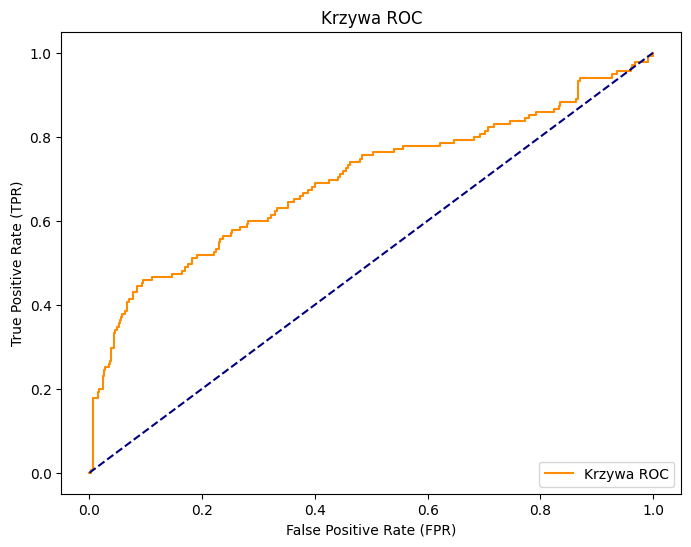

In [ ]:
import matplotlib.pyplot as plt

# Obliczanie wyników prognozy (prawdopodobieństwa)
prawdopodobienstwa_test = classifier.decision_function(X_test)

# Obliczanie FPR, TPR oraz progów dla krzywej ROC
fpr, tpr, progi = metrics.roc_curve(y_test, prawdopodobienstwa_test)

# Wykreślenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='Krzywa ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linie przerywanej "szansy"
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

### 7. Walidacja na zbiorze walidacyjnym

In [ ]:
# Wczytanie pliku walidacji
defaults_valid = pd.read_csv("defaults_valid.csv", sep = ";")

In [ ]:
# Przygotowujemy dane defaults_valid do modelu poprzez użycie funkcji prepare_data
dane_walidacyjne = (prepare_data(defaults_valid))

In [ ]:
# Dzielimy zbiór walidacyjny na cechy (X) i zmienną docelową (Y)
X_1 = dane_walidacyjne.drop(columns=["default payment next month"])
Y_1= dane_walidacyjne["default payment next month"].copy()

### 8. Ocena modelu na zbiorze **walidacyjnym**


In [ ]:
y_pred_1 = classifier.predict(X_1)   # predykcja na zbiorze walidacyjnym

In [ ]:
# Oblicza macierz pomyłek, raport klasyfikacji
cm1 = confusion_matrix(Y_1, y_pred_1)
print("Macierz pomyłek na zbiorze walidacyjnym.:\n", cm1)
print("Raport klasyfikacyjny dla zbioru walidacyjnego:\n", metrics.classification_report(Y_1, y_pred_1))
print("Dokładność na zborze walidacyjnym = %.2f" % ((cm[0, 0] + cm[1, 1]) / len(X_1)))

Macierz pomyłek na zbiorze walidacyjnym.:
 [[1516   59]
 [ 294  132]]
Raport klasyfikacyjny dla zbioru walidacyjnego:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1575
           1       0.69      0.31      0.43       426

    accuracy                           0.82      2001
   macro avg       0.76      0.64      0.66      2001
weighted avg       0.81      0.82      0.80      2001

Dokładność na zborze walidacyjnym = 0.24


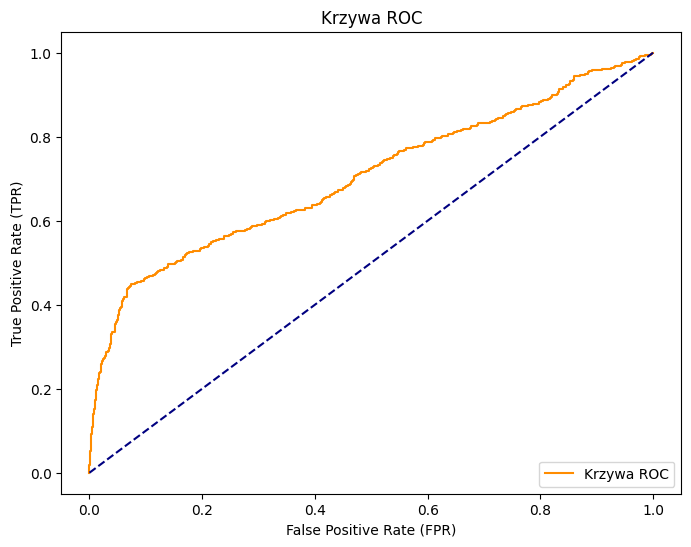

In [ ]:
# Krzywa ROC

# Obliczanie wyników prognozy (prawdopodobieństwa)
prawdopodobienstwa_test1 = classifier.decision_function(X_1)

# Obliczanie FPR, TPR oraz progów dla krzywej ROC
fpr1, tpr1, progi1 = metrics.roc_curve(Y_1, prawdopodobienstwa_test1)

# Ręczne wykreślenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', label='Krzywa ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linie przerywanej "szansy"
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

### 9. Przygotowanie modelu SVM przy użyciu GridSearch z walidacją krzyżową

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = {
    'C': [0.1, 0.5, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1, 'scale', 'auto'],
    'kernel': ['rbf']
}

# Dodanie KFold do walidacji krzyżowej
cv = KFold(n_splits=5, shuffle=True)

# Utworzenie modelu SVM
mdl = svm.SVC()

# GridSearchCV z parametrami
gridMdl = GridSearchCV(mdl, parameters, scoring='f1', cv=cv, refit=True)
gridMdl.fit(X_train, y_train)

# Ramka danych z wynikami wszystkich kombinacji parametrów
results_df = pd.DataFrame(gridMdl.cv_results_)
print("Wszystkie wyniki GridSearchCV:\n", results_df[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']])

Wszystkie wyniki GridSearchCV:
     param_C param_gamma  mean_test_score  std_test_score
0       0.1        0.01         0.000000        0.000000
1       0.1         0.1         0.000000        0.000000
2       0.1         0.5         0.000000        0.000000
3       0.1           1         0.000000        0.000000
4       0.1       scale         0.044409        0.025697
5       0.1        auto         0.044409        0.025697
6       0.5        0.01         0.272840        0.050088
7       0.5         0.1         0.321583        0.031970
8       0.5         0.5         0.017915        0.014917
9       0.5           1         0.000000        0.000000
10      0.5       scale         0.354797        0.046765
11      0.5        auto         0.358607        0.049440
12      1.0        0.01         0.343688        0.065645
13      1.0         0.1         0.366940        0.032337
14      1.0         0.5         0.113323        0.053217
15      1.0           1         0.042346        0.032999

In [ ]:
# Najlepszy model i wyniki
print("\nNajlepsze parametry:", gridMdl.best_params_)
print("Najlepszy wynik accuracy:", gridMdl.best_score_)


Najlepsze parametry: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Najlepszy wynik accuracy: 0.4497522939924966


### 10. Ocena najlepszego model na zbiorze testowym i walidacyjnym

In [ ]:
# Predykcja na zbiorze testowym za pomocą najlepszego modelu
best_model = gridMdl.best_estimator_

y_pred_best = best_model.predict(X_test)

# Generowanie raportu klasyfikacji
report = metrics.classification_report(y_test, y_pred_best)
print("Raport klasyfikacyjny dla najlepszego modelu na zbiorze testowym:\n", report)

Raport klasyfikacyjny dla najlepszego modelu na zbiorze testowym:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       465
           1       0.66      0.31      0.42       135

    accuracy                           0.81       600
   macro avg       0.74      0.63      0.65       600
weighted avg       0.79      0.81      0.78       600



In [ ]:
# Predykcje i raport klasyfikacji na zbiorze validacyjnym

y_pred_valid = best_model.predict(X_1)

# Generowanie raportu klasyfikacji
report1 = metrics.classification_report(Y_1, y_pred_valid)
print("Raport klasyfikacyjny dla najlepszego modelu na zbiorze validacyjnym:\n", report1)

Raport klasyfikacyjny dla najlepszego modelu na zbiorze validacyjnym:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1575
           1       0.71      0.32      0.44       426

    accuracy                           0.83      2001
   macro avg       0.78      0.64      0.67      2001
weighted avg       0.81      0.83      0.80      2001



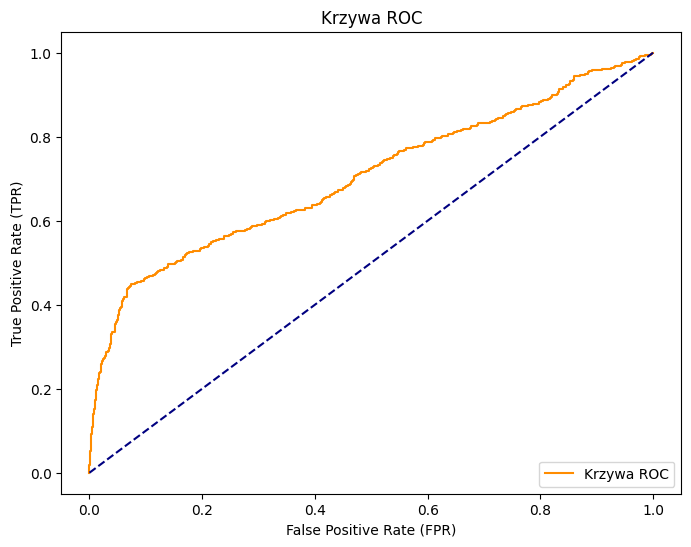

In [ ]:
# Krzywa ROC

# Obliczanie wyników prognozy (prawdopodobieństwa)
prawdopodobienstwa_test3 = classifier.decision_function(X_1)

# Obliczanie FPR, TPR oraz progów dla krzywej ROC
fpr3, tpr3, progi3 = metrics.roc_curve(Y_1, prawdopodobienstwa_test1)

# Ręczne wykreślenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', label='Krzywa ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linie przerywanej "szansy"
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

Oba modele – SVC z domyślnymi parametrami oraz SVC zestrojony za pomocą GridSearchCV – osiągają porównywalną jakość predykcji. Jednakże oba modele mają trudności z poprawnym przewidywaniem klasy 1 zmiennej „default payment next month”, co znajduje odzwierciedlenie w niskiej wartości recall (ok. 0.3). Niska wartość recall oznacza, że model często nie rozpoznaje przypadków, w których rzeczywista wartość to 1, co może być problematyczne w praktycznych zastosowaniach, takich jak ocena ryzyka kredytowego.

Aby poprawić wyniki, można rozważyć:

* zastosowanie technik balansowania klas, takich jak upsampling klasy mniejszościowej (np. SMOTE),
* lub zwiększenie zakresu danych treningowych, co może dostarczyć modelowi więcej informacji, szczególnie o przypadkach klasy 1.

### 11. Podnieśienie częstotliwości próbkowania zmiennej celu w zbiorze testowym

In [ ]:
from imblearn.over_sampling import SMOTE

# Podział cech (X) i zmiennej docelowej (Y)
X_up = defaults.drop(columns=["default payment next month", "ID"], errors="ignore")  # Usuwam kolumnę "ID", jeśli istnieje
Y_up = defaults["default payment next month"]

# Stosowanie SMOTE
smote = SMOTE(random_state=42)
X_upsampled, Y_upsampled = smote.fit_resample(X_up, Y_up)

# Łączenie cech i zmiennej docelowej w jedną ramkę danych
defaults_upsampling = pd.concat(
    [pd.DataFrame(X_upsampled, columns=X.columns), pd.Series(Y_upsampled, name="default payment next month")],
    axis=1
)

# Wyświetlenie wyników
print("Rozkład klas przed upsamplingiem:")
print(Y_up.value_counts())
print("\nRozkład klas po upsamplingiem:")
print(pd.Series(Y_upsampled).value_counts())

# Zapis do pliku CSV
defaults_upsampling.to_csv("defaults_upsampling.csv", index=False, sep=";")

print("Zapisano przetworzony zbiór danych do pliku 'defaults_upsampling.csv'.")


Rozkład klas przed upsamplingiem:
default payment next month
0    21789
1     6210
Name: count, dtype: int64

Rozkład klas po upsamplingiem:
default payment next month
1    21789
0    21789
Name: count, dtype: int64
Zapisano przetworzony zbiór danych do pliku 'defaults_upsampling.csv'.


### 12. Stworzenie modelu SVC po zastosowaniu "upsampling"

In [ ]:
defaults_up = pd.read_csv("defaults_upsampling.csv", sep = ";")

In [ ]:
# Losujemy 2000 rekordów ze zbioru danych
smplDfl_up = defaults_up.sample(n = 2000)

In [ ]:
# Funkcja przygotowuje dane do modelu SVM poprzez standaryzację zmiennych numerycznych.

from sklearn.preprocessing import OneHotEncoder, StandardScaler

def prepare_data(df):
    """
    Parametry:
    df (DataFrame): Dane wejściowe zawierające cechy oraz kolumnę docelową ("default payment next month").

    Zwraca:
    DataFrame: Zbiór danych gotowy do trenowania i testowania modelu, zawierający zarówno cechy, jak i zmienną docelową.
    """
    # Oddzielenie zmiennych wejściowych od zmiennej docelowej
    X = df.drop(columns=["default payment next month"])
    y = df["default payment next month"].reset_index(drop=True)

    # Usunięcie kolumny "ID", jeśli istnieje
    X = X.drop(columns=["ID"], errors="ignore")

    # Standaryzacja zmiennych numerycznych
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # Łączenie cech i zmiennej docelowej w jedną ramkę danych
    data_prepared = pd.concat([X.reset_index(drop=True), y], axis=1)

    return data_prepared

In [ ]:
 # Przygotowujemy próbkę danych smplDfl do modelu poprzez użycie funkcji prepare_data
 dane_testowe_up = (prepare_data(smplDfl_up))

In [ ]:
# Dzielimy zbiór testowy na cechy (X) i zmienną docelową (Y)
X_up1 = dane_testowe_up.drop(columns=["default payment next month"])
Y_up1 = dane_testowe_up["default payment next month"].copy()

In [ ]:
# Podział danych na zbiory treningowy i testowy
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up1, Y_up1, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
classifier_up = SVC(kernel="rbf")        # inicjacja modelu svc z jądrem "rbf" i parametrami domyślnymi

classifier_up.fit( X_train_up, y_train_up )    # trenowanie modelu

SVC()

In [ ]:
y_pred_up = classifier_up.predict(X_test_up)   # predykcja na zbiorze testowym

In [ ]:
# Oblicza macierz pomyłek, raport klasyfikacji

cm_up = confusion_matrix(y_test_up, y_pred_up)
print("Macierz pomyłek na zbiorze testowym.:\n", cm_up)
print("Raport klasyfikacyjny dla zbioru testowego:\n", metrics.classification_report(y_test_up, y_pred_up))

print("Dokładność zbioru testowego = %.2f" % ((cm_up[0, 0] + cm_up[1, 1]) / len(X_test_up)))

Macierz pomyłek na zbiorze testowym.:
 [[228  54]
 [102 216]]
Raport klasyfikacyjny dla zbioru testowego:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75       282
           1       0.80      0.68      0.73       318

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600

Dokładność zbioru testowego = 0.74


In [ ]:
# Wczytanie pliku walidacji
defaults_valid = pd.read_csv("defaults_valid.csv", sep = ";")

In [ ]:
# Przygotowujemy dane defaults_valid do modelu poprzez użycie funkcji prepare_data
dane_walidacyjne = (prepare_data(defaults_valid))

In [ ]:
# Dzielimy zbiór walidacyjny na cechy (X) i zmienną docelową (Y)
X_1 = dane_walidacyjne.drop(columns=["default payment next month"])
Y_1= dane_walidacyjne["default payment next month"].copy()

In [ ]:
y_pred_up_valid = classifier_up.predict(X_1)   # predykcja na zbiorze walidacyjnym

In [ ]:
# Oblicza macierz pomyłek, raport klasyfikacji
cm_up1 = confusion_matrix(Y_1, y_pred_up_valid)
print("Macierz pomyłek na zbiorze walidacyjnym.:\n", cm_up1)
print("Raport klasyfikacyjny dla zbioru walidacyjnego:\n", metrics.classification_report(Y_1, y_pred_up_valid))
print("Dokładność na zborze walidacyjnym = %.2f" % ((cm_up1[0, 0] + cm_up1[1, 1]) / len(X_1)))

Macierz pomyłek na zbiorze walidacyjnym.:
 [[1014  561]
 [ 137  289]]
Raport klasyfikacyjny dla zbioru walidacyjnego:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74      1575
           1       0.34      0.68      0.45       426

    accuracy                           0.65      2001
   macro avg       0.61      0.66      0.60      2001
weighted avg       0.77      0.65      0.68      2001

Dokładność na zborze walidacyjnym = 0.65


Komentarz: Dzięki zastosowaniu upsamplingu, model lepiej radzi sobie z klasą mniejszościową (klasa 1), osiągając wyższy recall (0.65) dla tej klasy. Niestety, kosztem poprawy dla klasy 1 jest pogorszenie wyników dla klasy 0 (spadek recall do 0.64). Ogólna dokładność modelu spadła do 0.64, co wynika z bardziej wyważonej klasyfikacji między klasami.